In [1]:
import pandas as pd


In [2]:
dataset = pd.read_csv("SCMS_Delivery_History_Dataset.csv.xls")


In [3]:
columns_affecting_pack_price = [
    'Country',
    'Shipment Mode',
    'Product Group',
    'Sub Classification',
    'Brand',
    'Unit of Measure (Per Pack)',
    'Line Item Quantity',
    'Line Item Value',
    'Pack Price'
]

# Create a new DataFrame with only the selected columns
data = dataset[columns_affecting_pack_price].copy()

# Display the new DataFrame
data.head()


,Country,Shipment Mode,Product Group,Sub Classification,Brand,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price
0,Côte d'Ivoire,Air,HRDT,HIV test,Reveal,30,19,551.0,29.00
1,Vietnam,Air,ARV,Pediatric,Generic,240,1000,6200.0,6.20
2,Côte d'Ivoire,Air,HRDT,HIV test,Determine,100,500,40000.0,80.00
3,Vietnam,Air,ARV,Adult,Generic,60,31920,127360.8,3.99
4,Vietnam,Air,ARV,Adult,Generic,60,38000,121600.0,3.20


In [4]:
data.shape

(10324, 9)

In [5]:
data.isnull().sum()

Country                         0
Shipment Mode                 360
Product Group                   0
Sub Classification              0
Brand                           0
Unit of Measure (Per Pack)      0
Line Item Quantity              0
Line Item Value                 0
Pack Price                      0
dtype: int64

In [6]:
data['Shipment Mode'].value_counts()

Shipment Mode
Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: count, dtype: int64

In [7]:
# Find rows where 'Shipment Mode' is null
null_shipment_mode_rows = data[data['Shipment Mode'].isnull()]

# Iterate over each null 'Shipment Mode' row
for index, row in null_shipment_mode_rows.iterrows():
    # Get the country name from the null row
    country = row['Country']
    
    # Find rows where 'Shipment Mode' is not null and country matches
    not_null_shipment_modes = data[(data['Country'] == country) & (data['Shipment Mode'].notnull())]['Shipment Mode']
    
    # If there are valid shipment modes for this country
    if not_null_shipment_modes.shape[0] > 0:
        # Find the most common shipment mode for this country
        most_common_shipment_mode = not_null_shipment_modes.mode().iloc[0]
        
        # Replace null 'Shipment Mode' with the most common mode for this country
        data.at[index, 'Shipment Mode'] = most_common_shipment_mode


In [8]:
data.isnull().sum()

Country                       0
Shipment Mode                 0
Product Group                 0
Sub Classification            0
Brand                         0
Unit of Measure (Per Pack)    0
Line Item Quantity            0
Line Item Value               0
Pack Price                    0
dtype: int64

In [9]:
data['Shipment Mode'].value_counts()

Shipment Mode
Air            6284
Truck          2983
Air Charter     686
Ocean           371
Name: count, dtype: int64

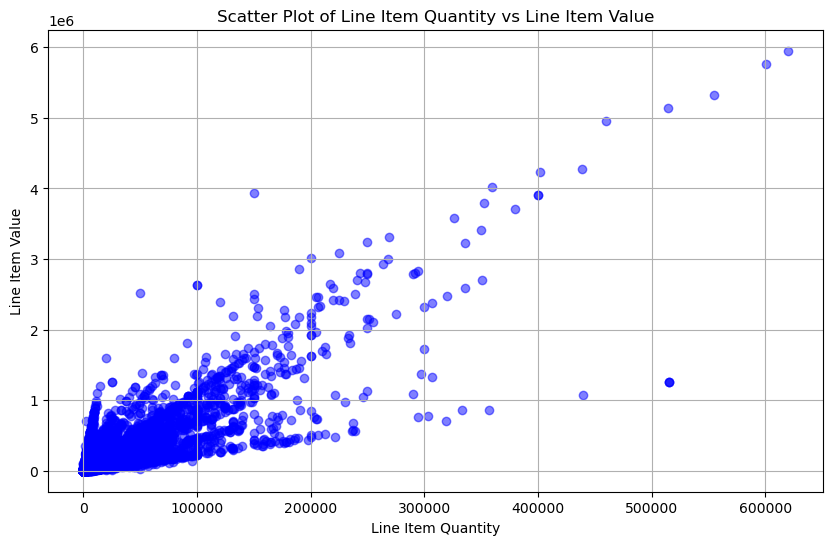

In [10]:
import matplotlib.pyplot as plt

# Extract the features for plotting
x = data['Line Item Quantity']
y = data['Line Item Value']

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5)
plt.title('Scatter Plot of Line Item Quantity vs Line Item Value')
plt.xlabel('Line Item Quantity')
plt.ylabel('Line Item Value')
plt.grid(True)
plt.show()

                              Feature Engineering
                              

In [11]:
# Find the counts of each value in the 'Brand' column
brand_counts = data['Brand'].value_counts()
brand_counts

# Identify values with counts below 100
brands_to_replace = brand_counts[brand_counts < 500].index
brands_to_replace

# Replace values below 100 with 'Others'
data.loc[data['Brand'].isin(brands_to_replace), 'Brand'] = 'Others'


In [12]:
data['Brand'].value_counts()

Brand
Generic      7285
Others       2240
Determine     799
Name: count, dtype: int64

In [13]:
# Find the counts of each value in the 'Country' column
country_counts = data['Country'].value_counts()

# Identify values with counts below 100
countries_to_replace = country_counts[country_counts < 500].index

# Replace values below 100 with 'Others'
data.loc[data['Country'].isin(countries_to_replace), 'Country'] = 'Others'


data['Country'].value_counts()

In [14]:
data.head()

,Country,Shipment Mode,Product Group,Sub Classification,Brand,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price
0,Côte d'Ivoire,Air,HRDT,HIV test,Others,30,19,551.0,29.00
1,Vietnam,Air,ARV,Pediatric,Generic,240,1000,6200.0,6.20
2,Côte d'Ivoire,Air,HRDT,HIV test,Determine,100,500,40000.0,80.00
3,Vietnam,Air,ARV,Adult,Generic,60,31920,127360.8,3.99
4,Vietnam,Air,ARV,Adult,Generic,60,38000,121600.0,3.20


                  One-Hot Encoding

In [15]:
# Select categorical columns
categorical_columns = ['Country', 'Shipment Mode', 'Product Group', 'Sub Classification', 'Brand']

# Apply one-hot encoding
encoded_data = pd.get_dummies(data, columns=categorical_columns)

# Display the encoded dataset
encoded_data.head()

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Country_Côte d'Ivoire,Country_Haiti,Country_Mozambique,Country_Nigeria,Country_Others,Country_South Africa,...,Product Group_MRDT,Sub Classification_ACT,Sub Classification_Adult,Sub Classification_HIV test,Sub Classification_HIV test - Ancillary,Sub Classification_Malaria,Sub Classification_Pediatric,Brand_Determine,Brand_Generic,Brand_Others
0,30,19,551.0,29.00,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,240,1000,6200.0,6.20,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,100,500,40000.0,80.00,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,60,31920,127360.8,3.99,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,60,38000,121600.0,3.20,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [16]:
encoded_data.columns

Index(['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value',
       'Pack Price', 'Country_Côte d'Ivoire', 'Country_Haiti',
       'Country_Mozambique', 'Country_Nigeria', 'Country_Others',
       'Country_South Africa', 'Country_Tanzania', 'Country_Uganda',
       'Country_Vietnam', 'Country_Zambia', 'Country_Zimbabwe',
       'Shipment Mode_Air', 'Shipment Mode_Air Charter', 'Shipment Mode_Ocean',
       'Shipment Mode_Truck', 'Product Group_ACT', 'Product Group_ANTM',
       'Product Group_ARV', 'Product Group_HRDT', 'Product Group_MRDT',
       'Sub Classification_ACT', 'Sub Classification_Adult',
       'Sub Classification_HIV test',
       'Sub Classification_HIV test - Ancillary', 'Sub Classification_Malaria',
       'Sub Classification_Pediatric', 'Brand_Determine', 'Brand_Generic',
       'Brand_Others'],
      dtype='object')

In [17]:
import numpy as np
from sklearn.ensemble import IsolationForest

# Define the features to be used for outlier detection
features_for_outlier_detection = ['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value', 'Pack Price']

# Initialize Isolation Forest outlier detector
outlier_detector = IsolationForest(contamination=0.05)  # Adjust the contamination parameter as needed

# Fit the outlier detector on the features
outlier_detector.fit(encoded_data[features_for_outlier_detection])

# Predict outliers
outliers = outlier_detector.predict(encoded_data[features_for_outlier_detection])

# Filter out noisy data
cleaned_data = encoded_data[outliers == 1]  # Keep only the inliers (non-outliers)

# Display the cleaned dataset
print("Cleaned dataset after filtering out noisy data:")
cleaned_data.shape

C:\Users\GOBI\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Cleaned dataset after filtering out noisy data:


(9807, 33)

In [18]:
# Display the new DataFrame
data.head(2)


,Country,Shipment Mode,Product Group,Sub Classification,Brand,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price
0,Côte d'Ivoire,Air,HRDT,HIV test,Others,30,19,551.0,29.0
1,Vietnam,Air,ARV,Pediatric,Generic,240,1000,6200.0,6.2


In [19]:
data['Country'].value_counts()

Country
Others           2148
South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Zambia            683
Haiti             655
Mozambique        631
Zimbabwe          538
Tanzania          519
Name: count, dtype: int64

In [20]:
data['Shipment Mode'].value_counts()

Shipment Mode
Air            6284
Truck          2983
Air Charter     686
Ocean           371
Name: count, dtype: int64

In [21]:
data['Product Group'].value_counts()

Product Group
ARV     8550
HRDT    1728
ANTM      22
ACT       16
MRDT       8
Name: count, dtype: int64

In [22]:
data['Sub Classification'].value_counts()

Sub Classification
Adult                   6595
Pediatric               1955
HIV test                1567
HIV test - Ancillary     161
Malaria                   30
ACT                       16
Name: count, dtype: int64

In [23]:
data['Brand'].value_counts()

Brand
Generic      7285
Others       2240
Determine     799
Name: count, dtype: int64

                         Model Bulding

In [24]:
X = cleaned_data.drop(columns=['Pack Price'])
y = cleaned_data['Pack Price']


In [25]:
X.shape

(9807, 32)

In [26]:
X.columns.tolist()

['Unit of Measure (Per Pack)',
 'Line Item Quantity',
 'Line Item Value',
 "Country_Côte d'Ivoire",
 'Country_Haiti',
 'Country_Mozambique',
 'Country_Nigeria',
 'Country_Others',
 'Country_South Africa',
 'Country_Tanzania',
 'Country_Uganda',
 'Country_Vietnam',
 'Country_Zambia',
 'Country_Zimbabwe',
 'Shipment Mode_Air',
 'Shipment Mode_Air Charter',
 'Shipment Mode_Ocean',
 'Shipment Mode_Truck',
 'Product Group_ACT',
 'Product Group_ANTM',
 'Product Group_ARV',
 'Product Group_HRDT',
 'Product Group_MRDT',
 'Sub Classification_ACT',
 'Sub Classification_Adult',
 'Sub Classification_HIV test',
 'Sub Classification_HIV test - Ancillary',
 'Sub Classification_Malaria',
 'Sub Classification_Pediatric',
 'Brand_Determine',
 'Brand_Generic',
 'Brand_Others']

In [27]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)


In [28]:
# training set shape

print("X_Train_Shape : ", X_train.shape)
print("y_Train_Shape : ", y_train.shape)


X_Train_Shape :  (7355, 32)
y_Train_Shape :  (7355,)


In [29]:
# testing set shape

print("X_Test_Shape : ", X_test.shape)
print("y_Test_Shape : ", y_test.shape)


X_Test_Shape :  (2452, 32)
y_Test_Shape :  (2452,)


                      XGBoost Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest classifier
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [31]:
# Make predictions on the testing data
y_test_pred = rf.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

print("Random Forest Model Evaluation:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Random Forest Model Evaluation:
Mean Absolute Error: 1.2952984910277328
Mean Squared Error: 15.54270724580343
Root Mean Squared Error: 3.9424240317098604
R-squared Score: 0.9736543731516387


In [32]:
# Make predictions on the testing data
y_train_pred = rf.predict(X_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = mean_squared_error(y_train, y_train_pred, squared = False)
r2 = r2_score(y_train, y_train_pred)

print("Random Forest Model Evaluation:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Random Forest Model Evaluation:
Mean Absolute Error: 0.5066464445955134
Mean Squared Error: 2.68125039161659
Root Mean Squared Error: 1.6374524089623461
R-squared Score: 0.9954825300099039


In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Initialize Decision Tree regressor
tr = DecisionTreeRegressor(random_state=42)

# Train the regressor on the scaled training data
tr.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [34]:
# Make predictions on the testing data
y_test_pred = tr.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

print("Decision Tree Regressor Model Evaluation:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Decision Tree Regressor Model Evaluation:
Mean Absolute Error: 1.5757055464926593
Mean Squared Error: 25.796549225122348
Root Mean Squared Error: 5.0790303430007535
R-squared Score: 0.9562736240789739


In [35]:
# Make predictions on the testing data
y_train_pred = tr.predict(X_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = mean_squared_error(y_train, y_train_pred, squared = False)
r2 = r2_score(y_train, y_train_pred)

print("Decision Tree Regressor Model Evaluation:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Decision Tree Regressor Model Evaluation:
Mean Absolute Error: 7.077459511267714e-17
Mean Squared Error: 6.360895085553747e-31
Root Mean Squared Error: 7.975521980130044e-16
R-squared Score: 1.0


In [36]:
import xgboost as xgb

# Initialize XGBoost regressor
xgb = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Train the regressor on the scaled training data
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [37]:
# Make predictions on the testing data
y_test_pred = xgb.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

print("XGBoost Regressor Model Evaluation:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

XGBoost Regressor Model Evaluation:
Mean Absolute Error: 1.3816557706456152
Mean Squared Error: 12.003008208641226
Root Mean Squared Error: 3.464535785446764
R-squared Score: 0.9796543311070817


In [38]:
# Make predictions on the testing data
y_train_pred = xgb.predict(X_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = mean_squared_error(y_train, y_train_pred, squared = False)
r2 = r2_score(y_train, y_train_pred)

print("XGBoost Regressor Model Evaluation:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

XGBoost Regressor Model Evaluation:
Mean Absolute Error: 0.6157811192378281
Mean Squared Error: 0.9927046149232058
Root Mean Squared Error: 0.9963456302524771
R-squared Score: 0.9983274544887837


In [39]:
import joblib

# Assuming model is your trained machine learning model
joblib.dump(xgb, 'model_02.pkl')

['model_02.pkl']